In [92]:

%matplotlib inline

from modsim import *
from numpy import random

from pandas import read_html

from pandas import read_csv

#from bs4 import BeautifulSoup4




In [79]:
filename= ("C:/Users/hnunes/documents/GitHub/ModSimpy/code/BeePop.csv")



tables = read_csv(filename, header=0, index_col=0, decimal='.')

#filename2= ('https://bip2.beeinformed.org/geo/')

#tables2= read_html(filename2, header=0, index_col=0, decimal='.')

In [90]:

table1 = tables 
table1.index[1]
col[1]
table1

,col,lost_col,%lost,add_col,ren_col,%ren
1,2619940,416100,16,571880,245060,9
4,2801470,329820,12,736920,561160,20
7,3181180,397290,12,217320,282130,9
10,3032060,502350,17,124660,60390,2


In [81]:
table1.columns = ['col', 'lost_col', '%lost', 'add_col', 
                  'ren_col', '%ren', ]

In [84]:
col = table1.col
lost_col = table1.lost_col
addcol = table1.add_col
ren_col = table1.ren_col

table1.index = [1, 4, 7, 10]


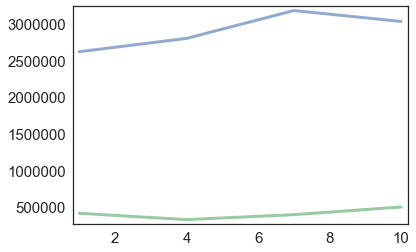

In [85]:
plot(table1.col)
plot(table1.lost_col)

In [164]:
init0= col[0]
t0= table1.index[0]
seasons=10


system = System(t0=t0, p0= init0, p_add= .1, p_lost= .11, p_resc= .03)

def step(system):
    n= random.randint(300000, 510000)
    d= random.randint(120000, 580000)
    r= random.randint(60000, 70000)
    return d - n + r
# the step funtion is really preliminary. It doesn't depend on any real factors yet, it literally just 
# picks a random number which is why the data is so choppy. We need to make n and d depend on actual other probability factors like 
#weather and blah blah and also have it distribute based on something more like a bell curve than just a random integer. 
    

def run_simulation(system): 
    results= TimeSeries()
    results[system.t0]= system.p0
    bees= system.p0
    for t in range(seasons):
        bees+= step(system)
        results[t+1] = bees
    return results
            
    
    

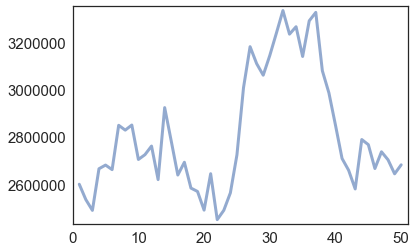

In [165]:
seasons = 50

g= run_simulation(system)

plot(g)